#  Import the required libraries

In [2]:
import numpy as np
import os
import csv
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#----------------------------------------------------------------------------------



# Reading the csv file

In [3]:
df=pd.read_csv("heart.csv")

# Data Visualization and Exploration

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
# Dropping duplicate recrods from the dataframe
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(302, 14)

In [12]:
# Finding categorical and numerical fetaures in dataframe
numericaldata = df.select_dtypes(include=['number']).columns
categoricaldata = df.select_dtypes(include=['object']).columns

In [13]:
numericaldata

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
categoricaldata

Index([], dtype='object')

In [15]:
# Finding unique values for each feature
for i in df.columns:
    print('\n\n',i)
    print(df[i].unique())



 age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


 sex
[1 0]


 cp
[3 2 1 0]


 trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


 chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF11801888>,
      dtype=object)

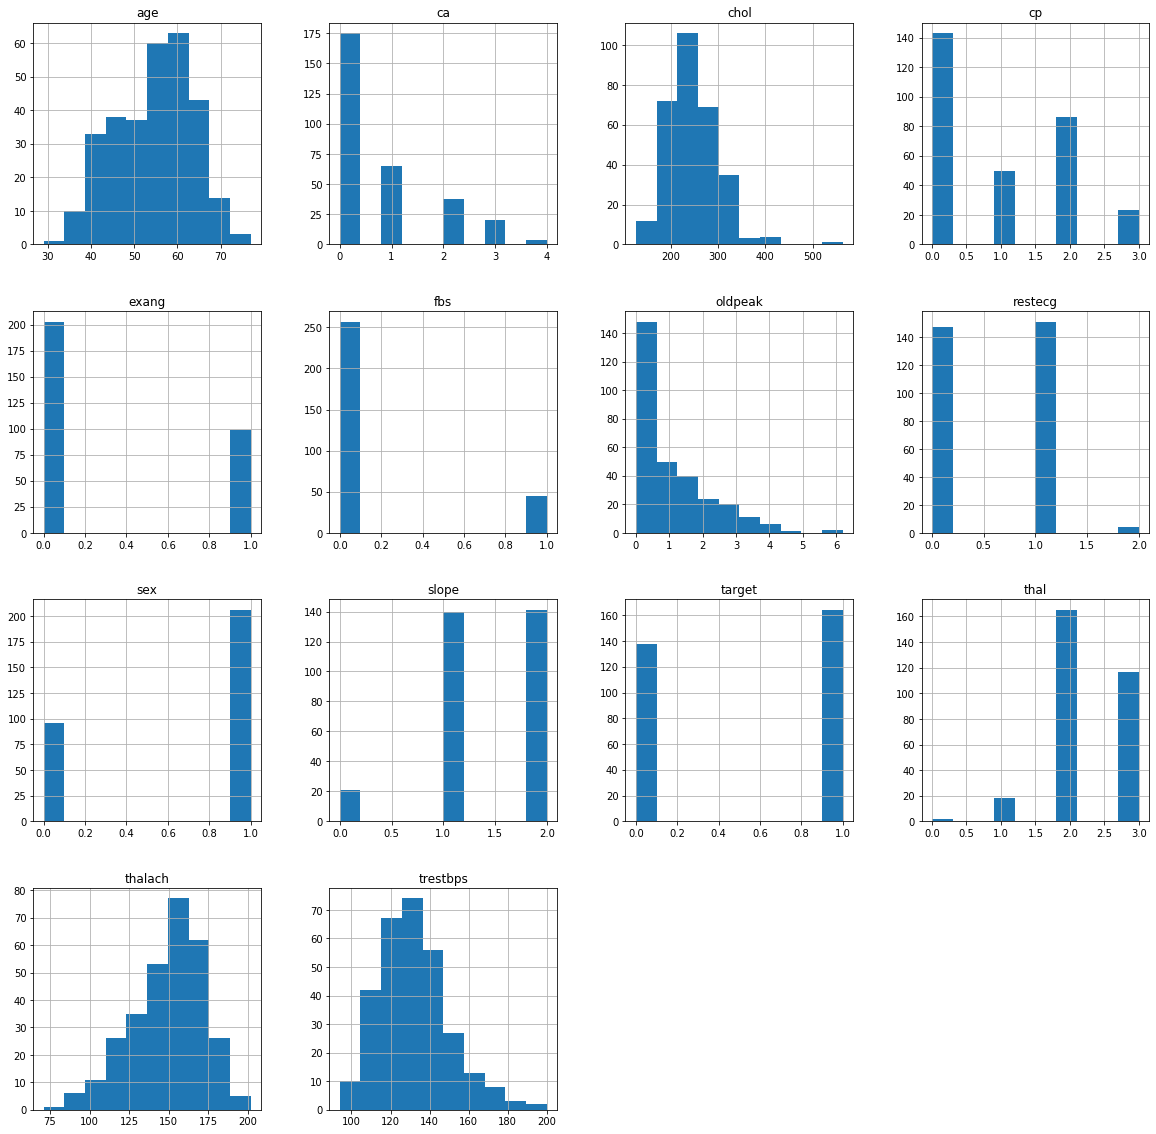

In [16]:
# Histogram/Distribution of data for each feature
df.hist(figsize=(20,20))

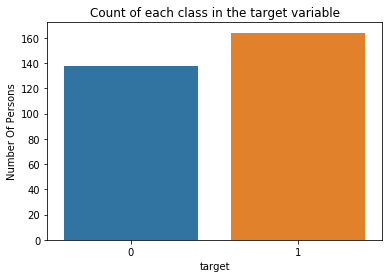

In [17]:
# Number of people having heart disease vs not having heart disease
sns.countplot(data=df, x='target')
plt.title("Count of each class in the target variable")
plt.ylabel("Number Of Persons")
plt.show()

Text(0, 0.5, 'Number Of Persons')

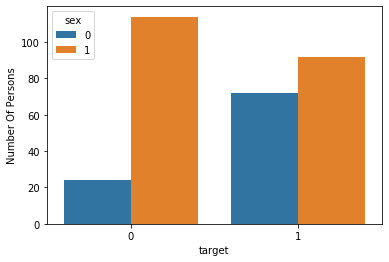

In [18]:
# Number of people having heart disease vs not having heart disease based on the gender
sns.countplot(x=df['target'],hue='sex',data=df)
plt.ylabel("Number Of Persons")

Text(0.5, 1.0, 'Age')

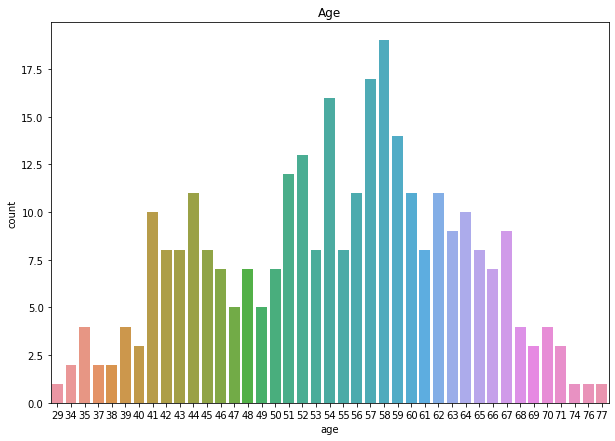

In [19]:
#Distribution based on age
plt.subplots(figsize=(10, 7))
sns.countplot(x='age',data=df);
plt.title('Age')

In [20]:
# Printing min, max and avg age in the data frame
print("Max age is",df['age'].max())
print("Min age is",df['age'].min())
print("Avg age is",df['age'].mean())


Max age is 77
Min age is 29
Avg age is 54.420529801324506


Text(0, 0.5, 'Number Of Persons')

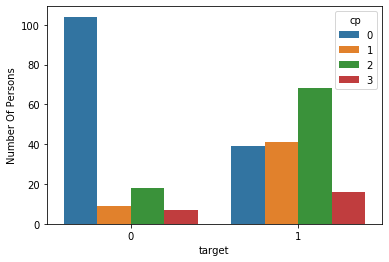

In [21]:
# Number of people having heart disease vs not having heart disease based on chest pain
sns.countplot(x=df['target'],hue='cp',data=df)
plt.ylabel("Number Of Persons")

In [22]:
# Printing min, max and avg heart rate reached
print("Max age is",df['thalach'].max())
print("Min age is",df['thalach'].min())
print("Avg age is",df['thalach'].mean())

Max age is 202
Min age is 71
Avg age is 149.56953642384107


Text(0, 0.5, 'Number Of Persons')

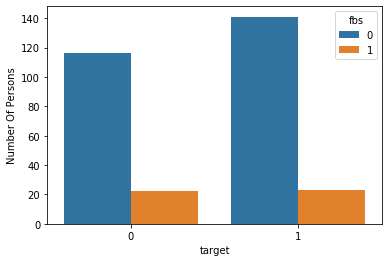

In [23]:
# Number of people having heart disease vs not having heart disease based on fasting blood sugar
sns.countplot(x=df['target'],hue='fbs',data=df)
plt.ylabel("Number Of Persons")

Text(0, 0.5, 'Number Of Persons')

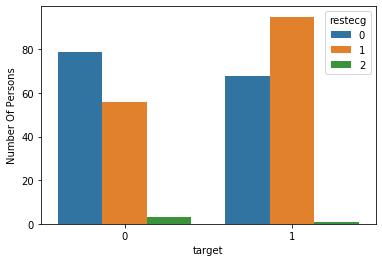

In [24]:
# Number of people having heart disease vs not having heart disease based on resting electrocardiographic
sns.countplot(x=df['target'],hue='restecg',data=df)
plt.ylabel("Number Of Persons")

In [25]:
#plt.figure(figsize=(10,5))
#plt.title("Chest Pain and Heart Disease",fontdict={"fontname":"monospace","fontsize": 20})
#sns.histplot(x="cp",
#             data=df,
#             hue="target",
#             multiple="stack",
#             palette="terrain")
#plt.show()

In [27]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


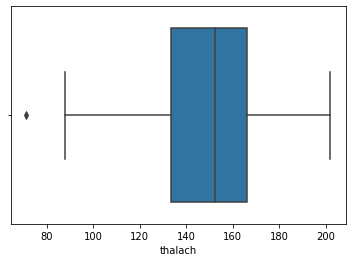

In [60]:
# Checking for Outliers using box plot for thalach
sns.boxplot(df['thalach'])

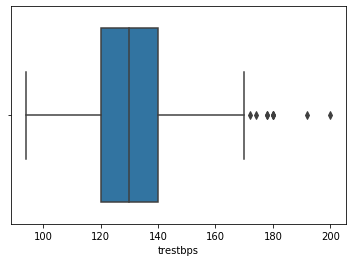

In [61]:
# Checking for Outliers using box plot for trestbps
sns.boxplot(df['trestbps'])

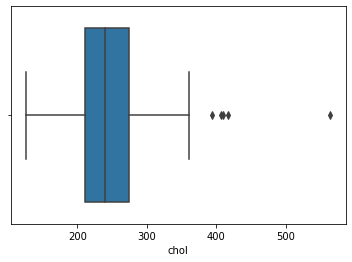

In [62]:
# Checking for Outliers using box plot for chol
sns.boxplot(df['chol'])

In [55]:
#Creating a copy of the existing dataframe
new_df=df

In [56]:
new_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [63]:
# Dropping the outliers for the below features
new_df=new_df[new_df.trestbps < 190]
new_df=new_df[new_df.chol < 450]
new_df=new_df[new_df.thalach > 80]

In [69]:
#Dataframe shape after dropping few of the outliers
new_df.shape

(298, 14)

In [70]:
new_df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


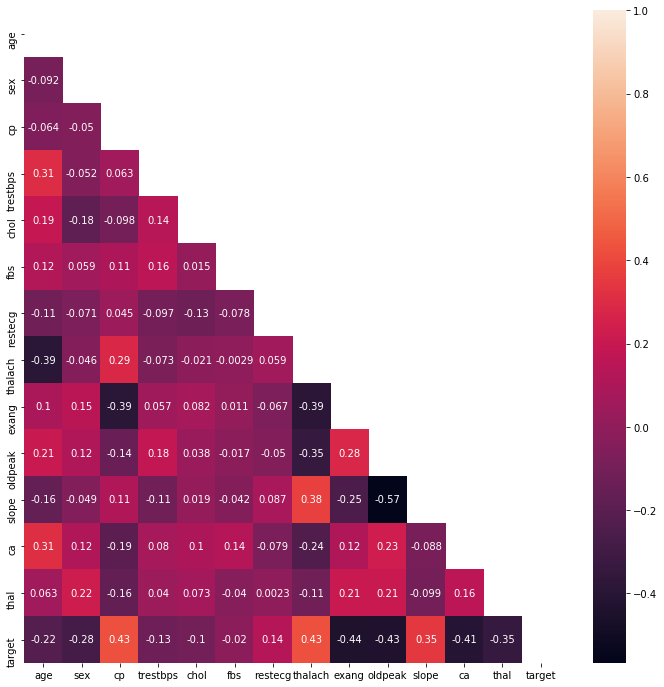

In [71]:
corr=new_df.corr()
plt.figure(figsize=(12,12))
matrix = np.triu(corr)
corr_heatmap = sns.heatmap(corr,annot=True,mask=matrix)
plt.show()